In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# !pip install seaborn
import seaborn as sns

# Kmeans

## Import du fichier de data

In [2]:
# df = pd.read_csv('./mobile_prices.csv', index_col=-1)
df = pd.read_csv('./mobile_prices.csv')

df


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [3]:
## Stats desc
# Unidimensionnelle

df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


<AxesSubplot:>

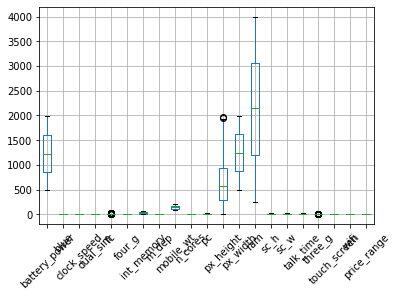

In [4]:
# df.plot.bo
df.boxplot(rot=45)

In [5]:
corr = df.corr()
corr

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


In [6]:
# Boucle qui permet de d'avoir les crosstab avec le price_range
cols = list(df.drop('price_range', 1).columns.values)
for col in cols: 
    xdf = pd.crosstab(df[col], df['price_range'], normalize=True, margins=True)*100
    print(xdf)
    print('') 

<ipython-input-6-3e21ff2b4cb1>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  cols = list(df.drop('price_range', 1).columns.values)


price_range        0      1      2      3     All
battery_power                                    
501             0.00   0.05   0.05   0.00    0.10
502             0.00   0.05   0.05   0.00    0.10
503             0.05   0.05   0.00   0.05    0.15
504             0.15   0.05   0.05   0.00    0.25
506             0.00   0.00   0.05   0.00    0.05
...              ...    ...    ...    ...     ...
1995            0.00   0.05   0.05   0.00    0.10
1996            0.00   0.05   0.05   0.00    0.10
1997            0.00   0.00   0.05   0.00    0.05
1998            0.00   0.00   0.05   0.00    0.05
All            25.00  25.00  25.00  25.00  100.00

[1095 rows x 5 columns]

price_range      0      1      2      3    All
blue                                          
0            12.85  12.75  12.85  12.05   50.5
1            12.15  12.25  12.15  12.95   49.5
All          25.00  25.00  25.00  25.00  100.0

price_range      0      1      2      3     All
clock_speed                             

price_range      0     1     2      3     All
ram                                          
256           0.05   0.0   0.0   0.00    0.05
258           0.10   0.0   0.0   0.00    0.10
259           0.05   0.0   0.0   0.00    0.05
262           0.05   0.0   0.0   0.00    0.05
263           0.05   0.0   0.0   0.00    0.05
...            ...   ...   ...    ...     ...
3991          0.00   0.0   0.0   0.10    0.10
3993          0.00   0.0   0.0   0.05    0.05
3996          0.00   0.0   0.0   0.05    0.05
3998          0.00   0.0   0.0   0.05    0.05
All          25.00  25.0  25.0  25.00  100.00

[1563 rows x 5 columns]

price_range      0      1      2      3     All
sc_h                                           
5             1.20   1.35   1.10   1.20    4.85
6             1.55   1.40   1.55   1.20    5.70
7             1.70   1.95   2.30   1.60    7.55
8             1.30   1.70   1.60   1.25    5.85
9             1.50   1.45   1.75   1.50    6.20
10            1.65   1.40   1.90   1.30 

In [18]:
X = df.drop('price_range', 1)
# X = titanic[['pclass', 'sex', 'age', 'sibsp', 'parch']]
y = df['price_range']
# X #  dataframe
# y #  Series

<ipython-input-18-9dc11daf8d5d>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df.drop('price_range', 1)


In [19]:
X_train_sf, X_test_sf, y_train_sf, y_test_sf = train_test_split(X, y)

NameError: name 'train_test_split' is not defined

In [7]:
# Boucle qui regroupe les colonnes avec price_range
for col in df.columns[:-1]:
    x = df[df['price_range'] == 1 ].groupby([col,'price_range']).size().unstack()/len(df)*100#.plot(kind='bar', stacked=True)
    print(x)

price_range       1
battery_power      
501            0.05
502            0.05
503            0.05
504            0.05
507            0.10
...             ...
1987           0.05
1991           0.10
1992           0.05
1995           0.05
1996           0.05

[426 rows x 1 columns]
price_range      1
blue              
0            12.75
1            12.25
price_range     1
clock_speed      
0.5          5.25
0.6          1.10
0.7          0.85
0.8          0.80
0.9          0.65
1.0          1.10
1.1          0.50
1.2          0.75
1.3          1.00
1.4          0.45
1.5          1.05
1.6          0.85
1.7          0.80
1.8          0.70
1.9          1.10
2.0          0.65
2.1          0.80
2.2          0.70
2.3          0.95
2.4          0.70
2.5          0.85
2.6          0.60
2.7          0.60
2.8          1.15
2.9          0.75
3.0          0.30
price_range      1
dual_sim          
0            12.25
1            12.75
price_range     1
fc               
0            6.20
1     

In [15]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [14]:
from sklearn.tree import plot_tree
plt.figure(figsize = (10,20))
tree_ = plot_tree(tree)

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

<Figure size 720x1440 with 0 Axes>

In [7]:
# HeatMap : 
# https://stackoverflow.com/questions/39409866/correlation-heatmap

cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

<ipython-input-7-548b184d656f>:18: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap, axis=1)\


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
battery_power,1.00,0.01,0.01,-0.04,0.03,0.02,-0.00,0.03,0.00,-0.03,0.03,0.01,-0.01,-0.00,-0.03,-0.02,0.05,0.01,-0.01,-0.01
blue,0.01,1.00,0.02,0.04,0.00,0.01,0.04,0.00,-0.01,0.04,-0.01,-0.01,-0.04,0.03,-0.00,0.00,0.01,-0.03,0.01,-0.02
clock_speed,0.01,0.02,1.00,-0.00,-0.00,-0.04,0.01,-0.01,0.01,-0.01,-0.01,-0.01,-0.01,0.00,-0.03,-0.01,-0.01,-0.05,0.02,-0.02
dual_sim,-0.04,0.04,-0.00,1.00,-0.03,0.00,-0.02,-0.02,-0.01,-0.02,-0.02,-0.02,0.01,0.04,-0.01,-0.02,-0.04,-0.01,-0.02,0.02
fc,0.03,0.00,-0.00,-0.03,1.00,-0.02,-0.03,-0.00,0.02,-0.01,0.64,-0.01,-0.01,0.02,-0.01,-0.01,-0.01,0.00,-0.01,0.02
four_g,0.02,0.01,-0.04,0.00,-0.02,1.00,0.01,-0.00,-0.02,-0.03,-0.01,-0.02,0.01,0.01,0.03,0.04,-0.05,0.58,0.02,-0.02
int_memory,-0.00,0.04,0.01,-0.02,-0.03,0.01,1.00,0.01,-0.03,-0.03,-0.03,0.01,-0.01,0.03,0.04,0.01,-0.00,-0.01,-0.03,0.01
m_dep,0.03,0.00,-0.01,-0.02,-0.00,-0.00,0.01,1.00,0.02,-0.00,0.03,0.03,0.02,-0.01,-0.03,-0.02,0.02,-0.01,-0.00,-0.03
mobile_wt,0.00,-0.01,0.01,-0.01,0.02,-0.02,-0.03,0.02,1.00,-0.02,0.02,0.00,0.00,-0.00,-0.03,-0.02,0.01,0.00,-0.01,-0.00
n_cores,-0.03,0.04,-0.01,-0.02,-0.01,-0.03,-0.03,-0.00,-0.02,1.00,-0.00,-0.01,0.02,0.00,-0.00,0.03,0.01,-0.01,0.02,-0.01


### On remarque qu'on n'a pas beaucoup de corrélation entre les colonnes

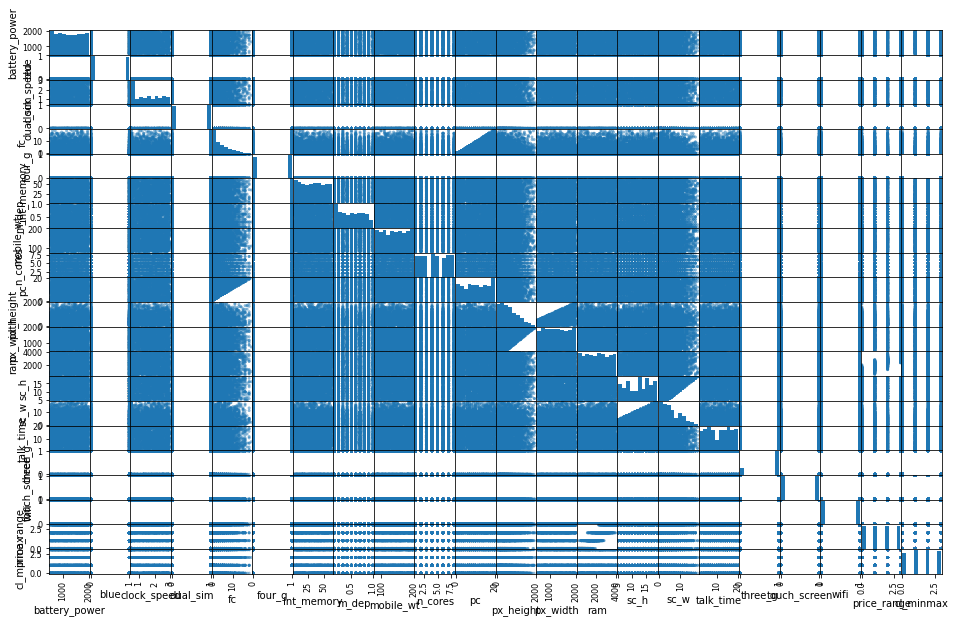

In [54]:
# bidimensionnelle
from pandas.plotting import scatter_matrix
scatter_mat = scatter_matrix(df, figsize = (16,10))

In [78]:
# sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=0)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,cl_minmax
count,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,...,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2000.000000,2.000000e+03
mean,2.149392e-16,-1.243450e-17,-1.545430e-16,8.082424e-17,5.861978e-17,1.048051e-16,-9.592327e-17,-1.030287e-16,1.278977e-16,-7.727152e-17,...,6.084022e-17,-1.811884e-16,4.884981e-17,-5.506706e-17,1.421085e-16,1.421085e-17,-5.417888e-17,1.421085e-17,0.000000,2.176037e-17
std,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,...,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250,1.000250e+00
min,-1.678817e+00,-9.900495e-01,-1.253064e+00,-1.019184e+00,-9.928904e-01,-1.043966e+00,-1.656260e+00,-1.393304e+00,-1.702391e+00,-1.539175e+00,...,-1.739251e+00,-1.722711e+00,-1.734608e+00,-1.324131e+00,-1.649584e+00,-1.786861e+00,-1.006018e+00,-1.014099e+00,-1.341641,-1.393156e+00
25%,-8.804033e-01,-9.900495e-01,-1.007906e+00,-1.019184e+00,-7.624947e-01,-1.043966e+00,-8.845346e-01,-1.046495e+00,-8.829695e-01,-6.647678e-01,...,-8.719579e-01,-8.453168e-01,-7.849833e-01,-8.649215e-01,-9.173306e-01,5.596406e-01,-1.006018e+00,-1.014099e+00,-0.670820,-4.825965e-01
50%,-2.849593e-02,-9.900495e-01,-2.727384e-02,9.811771e-01,-3.017032e-01,9.578860e-01,-2.563229e-03,-6.069151e-03,2.122020e-02,-2.275644e-01,...,-1.045034e-02,2.055123e-02,-7.276497e-02,-1.761069e-01,-2.013697e-03,5.596406e-01,9.940179e-01,9.860966e-01,0.000000,4.279630e-01
75%,8.575560e-01,1.010051e+00,8.307794e-01,9.811771e-01,6.198797e-01,9.578860e-01,8.794082e-01,1.034357e+00,8.406421e-01,1.084046e+00,...,8.828792e-01,8.670548e-01,8.768595e-01,7.423125e-01,9.133032e-01,5.596406e-01,9.940179e-01,9.860966e-01,0.670820,4.279630e-01
max,1.728812e+00,1.010051e+00,1.811412e+00,9.811771e-01,3.384628e+00,9.578860e-01,1.761380e+00,1.727974e+00,1.688320e+00,1.521249e+00,...,1.727608e+00,1.727851e+00,1.589078e+00,2.808756e+00,1.645557e+00,5.596406e-01,9.940179e-01,9.860966e-01,1.341641,1.338523e+00


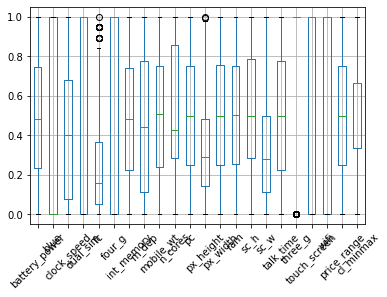

In [56]:
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
# min_max
min_max.fit(df)
min_max.data_min_
min_max.data_max_
min_max.transform(df)
pd.DataFrame(min_max.transform(df), columns = df.columns, index=df.index).boxplot(rot = 45)
df_minmax = min_max.fit_transform(df)
df_minmax
df_scale = scale(df)
df_scale
pd.DataFrame(df_scale, columns = df.columns, index=df.index).describe()


In [57]:
df.sample(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,cl_minmax
1300,664,0,1.5,0,5,1,6,0.9,164,2,...,1472,3774,11,5,18,1,0,0,3,1
397,880,1,1.7,1,0,0,33,0.7,173,2,...,1350,1414,12,1,7,1,1,0,0,0
247,1273,0,1.0,0,3,1,48,0.4,99,4,...,886,1767,18,15,11,1,1,0,1,1
1692,1958,0,0.5,0,6,1,52,0.4,153,1,...,1848,3064,7,6,3,1,0,0,3,1
91,1977,1,2.0,1,7,1,54,1.0,171,7,...,1242,1971,18,7,14,1,1,0,2,2


In [58]:
pd.DataFrame(df_minmax, columns=df.columns, index=df.index)# .describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,cl_minmax
0,0.227789,0.0,0.68,0.0,0.052632,0.0,0.080645,0.555556,0.900000,0.142857,...,0.170895,0.612774,0.285714,0.388889,0.944444,0.0,0.0,1.0,0.333333,1.000000
1,0.347361,1.0,0.00,1.0,0.000000,1.0,0.822581,0.666667,0.466667,0.285714,...,0.993324,0.634687,0.857143,0.166667,0.277778,1.0,1.0,0.0,0.666667,0.666667
2,0.041416,1.0,0.00,1.0,0.105263,1.0,0.629032,0.888889,0.541667,0.571429,...,0.811749,0.627205,0.428571,0.111111,0.388889,1.0,1.0,0.0,0.666667,0.666667
3,0.076152,1.0,0.80,0.0,0.000000,0.0,0.129032,0.777778,0.425000,0.714286,...,0.858478,0.671566,0.785714,0.444444,0.500000,1.0,0.0,0.0,0.666667,1.000000
4,0.881764,1.0,0.28,0.0,0.684211,1.0,0.677419,0.555556,0.508333,0.142857,...,0.475300,0.308658,0.214286,0.111111,0.722222,1.0,1.0,0.0,0.333333,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.195725,1.0,0.00,1.0,0.000000,1.0,0.000000,0.777778,0.216667,0.714286,...,0.927904,0.110102,0.571429,0.222222,0.944444,1.0,1.0,0.0,0.000000,0.666667
1996,0.977956,1.0,0.84,1.0,0.000000,0.0,0.596774,0.111111,0.891667,0.428571,...,0.977971,0.474613,0.428571,0.555556,0.777778,1.0,1.0,1.0,0.666667,0.000000
1997,0.941884,0.0,0.16,1.0,0.052632,1.0,0.548387,0.666667,0.233333,1.000000,...,0.755674,0.748530,0.285714,0.055556,0.166667,1.0,1.0,0.0,1.000000,0.333333
1998,0.675351,0.0,0.16,0.0,0.210526,1.0,0.709677,0.000000,0.541667,0.571429,...,0.113485,0.163816,0.928571,0.555556,0.944444,1.0,1.0,1.0,0.000000,0.333333


<AxesSubplot:>

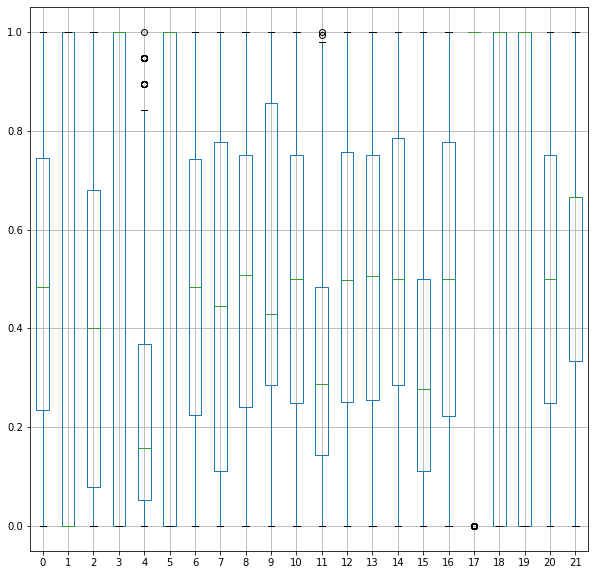

In [89]:
pd.DataFrame(df_minmax).boxplot(figsize=(10,10))

<AxesSubplot:>

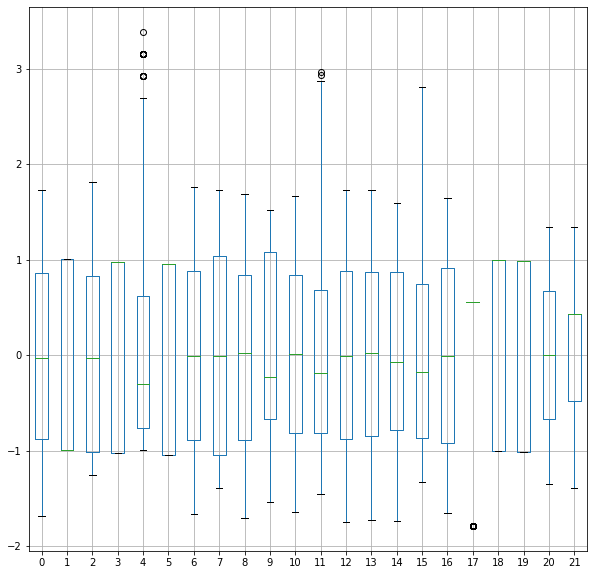

In [90]:
pd.DataFrame(df_scale).boxplot(figsize=(10,10))

In [61]:
# Kmeans sur le df_minmax
from sklearn import cluster
kmeans_minmax = cluster.KMeans(n_clusters=4, random_state=42)
kmeans_minmax.fit(df_minmax)

KMeans(n_clusters=4, random_state=42)

In [62]:
kmeans_minmax.n_iter_ 
kmeans_minmax.labels_
# [0, 1, 3, 1, 0, 1, 0, 0, 1, 3, 0, 3, 3, 0, 1, 2, 2, 1, 1, 3, 2, 1,
#        1, 1, 1, 1, 1, 1, 2]

array([2, 0, 0, ..., 1, 1, 0], dtype=int32)

In [63]:
kmeans_minmax.inertia_,kmeans_orig

(4409.960418387474, KMeans(n_clusters=4, random_state=42))

In [64]:
# Kmeans sur le df d'origine
kmeans_orig = cluster.KMeans(n_clusters=4, random_state=42)
kmeans_orig.fit(df)
kmeans_orig.labels_

array([2, 3, 3, ..., 1, 0, 1], dtype=int32)

In [65]:
df['cl_minmax']=kmeans_minmax.labels_
df.sort_values('cl_minmax')
# df['cl_orig']=kmeans_orig.labels_
df.sort_values('cl_minmax')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,cl_minmax
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,754,3919,19,4,2,1,1,1,3,0
930,1558,1,2.4,0,0,1,27,0.1,146,1,...,1409,3598,9,2,12,1,0,1,3,0
438,853,1,2.0,0,10,1,3,0.6,200,2,...,740,3701,15,8,8,1,1,0,3,0
929,1689,1,2.4,1,0,1,13,0.9,168,2,...,674,1172,12,11,17,1,1,1,0,0
1408,1791,1,0.5,1,1,1,33,0.5,110,5,...,682,594,17,8,16,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
704,1358,0,2.5,1,0,0,20,0.6,135,7,...,1655,3406,5,1,11,0,0,1,3,3
701,1717,1,1.3,0,1,0,62,0.7,130,1,...,810,3226,6,4,5,0,1,0,3,3
1557,1211,1,1.2,0,0,0,28,0.3,130,2,...,963,2750,6,1,14,0,1,0,2,3
1544,1330,1,1.8,1,1,0,40,0.5,177,1,...,892,2678,9,4,14,1,1,1,2,3


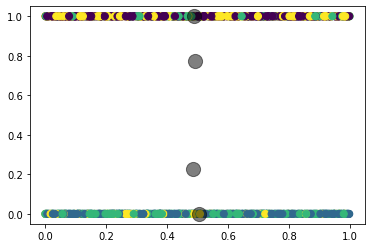

In [66]:
y_kmeans = kmeans_minmax.predict(df_minmax)
centers = kmeans_minmax.cluster_centers_
plt.figure()
plt.scatter(df_minmax[ : , 0], df_minmax[ : , 1], c=y_kmeans, s=50, cmap='viridis')
colmap = {1: 'r', 2: 'g', 3: 'b', 4: 'y'}
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [67]:
# matrice des distance
# pd.DataFrame(kmeans_minmax.transform(df_minmax))
# Inertie
kmeans_minmax.inertia_

4409.960418387474

*** For n_clusters = 2, inertia is 5139.147151604507 ***

*** For n_clusters = 3, inertia is 4701.244076235885 ***

*** For n_clusters = 4, inertia is 4409.9604183874735 ***

*** For n_clusters = 5, inertia is 4278.008406634277 ***

*** For n_clusters = 6, inertia is 4125.618578079226 ***

*** For n_clusters = 7, inertia is 4028.1919209567 ***

*** For n_clusters = 8, inertia is 3931.784764201684 ***

*** For n_clusters = 9, inertia is 3839.725139067758 ***

*** For n_clusters = 10, inertia is 3768.6933146109004 ***



Text(0.5, 1.0, 'Optimal nb of clusters')

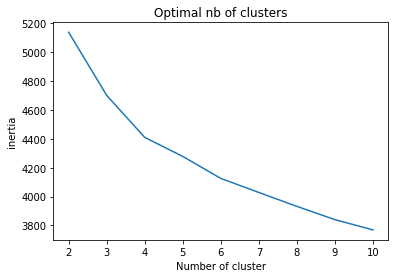

In [68]:
scores = {}
for k in range(2, 11):
    km = cluster.KMeans(n_clusters=k, random_state=42)
    km.fit(df_minmax)
    scores[k] = km.inertia_
    print(f'*** For n_clusters = {k}, inertia is {km.inertia_} ***\n')
plt.figure()
plt.plot(list(scores.keys()), list(scores.values()))
plt.xlabel("Number of cluster")
plt.ylabel("inertia")
plt.title("Optimal nb of clusters")

*** For n_clusters=2, The Silhouette Coefficient is 0.10934060379192007 ***

*** For n_clusters=3, The Silhouette Coefficient is 0.12970734643963666 ***

*** For n_clusters=4, The Silhouette Coefficient is 0.11497712590432552 ***

*** For n_clusters=5, The Silhouette Coefficient is 0.09531654090279063 ***

*** For n_clusters=6, The Silhouette Coefficient is 0.10372855627250598 ***

*** For n_clusters=7, The Silhouette Coefficient is 0.099618140105864 ***

*** For n_clusters=8, The Silhouette Coefficient is 0.10107157532282357 ***

*** For n_clusters=9, The Silhouette Coefficient is 0.10634177713630402 ***

*** For n_clusters=10, The Silhouette Coefficient is 0.10458041025652236 ***

[0.10934060379192007, 0.12970734643963666, 0.11497712590432552, 0.09531654090279063, 0.10372855627250598, 0.099618140105864, 0.10107157532282357, 0.10634177713630402, 0.10458041025652236]


Text(0.5, 1.0, 'Optimal nb of clusters')

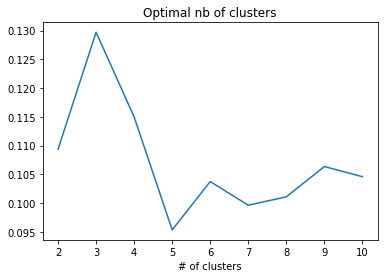

In [69]:
from sklearn import metrics

# Utilisation de la métrique "silhouette"
# Faire varier le nombre de clusters de 2 à 10
scores = []
for k in range(2, 11):
    km = cluster.KMeans(n_clusters = k, random_state = 42)
    km.fit(df_minmax)
    score = metrics.silhouette_score(df_minmax, km.labels_)
    scores.append(score)
    print(f'*** For n_clusters={k}, The Silhouette Coefficient is {score} ***\n')

print(scores)
# S :
# [0.46125628440580635, 0.40294238189905895, 0.41627447069733386, 0.3900272705972848, 0.3228464903008829, 0.3473776041463943, 0.3412276622157032, 0.25028718369271796, 0.22147311807421863]

# Graphique
plt.figure()
plt.title("Silhouette")
plt.xlabel("# of clusters")
plt.plot(range(2, 11, 1), scores)
plt.title("Optimal nb of clusters")

In [70]:
import sklearn
sklearn.__version__

'1.0.1'

In [71]:
from sklearn.cluster import KMeans

In [79]:
kmeans = KMeans(n_clusters=3, random_state=42)

In [80]:
kmeans.fit(df)

KMeans(n_clusters=3, random_state=42)

In [82]:
cl3 = kmeans.labels_
cl3

array([2, 2, 2, ..., 0, 1, 0], dtype=int32)

In [75]:
df['cl_minmax'].describe()

count    2000.000000
mean        1.446500
std         1.108942
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         3.000000
Name: cl_minmax, dtype: float64

In [85]:
pd.crosstab(df.price_range, df.cl_minmax)

cl_minmax,0,1,2,3
price_range,,,,
0,122,137,127,114
1,136,126,121,117
2,117,130,133,120
3,148,127,117,108
